In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
def loadFiles(filename,columns=None):
    if type(filename)==str:
        prod = pd.read_csv(filename)
        prod = prod.set_index(pd.to_datetime(prod['time'])).sort_index().drop(
            ['time', 'E_min_min', 'E_min_max', 'E_min_type', 'E_min_unit',
            'E_max_min', 'E_max_max', 'E_max_type', 'E_max_unit', 'E_count_min',
            'E_count_max', 'E_count_type', 'E_count_unit', 'E_max','E_type', 
            'E_unit'], axis=1)
        prod = prod.resample(rule="1H").ffill()
        return prod["E_min"]
    elif type(filename)==list:
        prod = pd.DataFrame()
        for name in filename:
            df=loadFiles(name)
            prod[name]=df
            
        if columns is not None:
            prod.columns=columns
            
        return prod

pst = ['Prod-Hvedemarken16.csv', 'Prod-Hvedemarken22.csv', 'Prod-Hvedemarken28.csv', 'Prod-Hvedemarken32.csv']
pnames = ['Prod16', 'Prod22', 'Prod28', 'Prod32']
cst = ['Cons-Hvedemarken16.csv', 'Cons-Hvedemarken22.csv', 'Cons-Hvedemarken28.csv', 'Cons-Hvedemarken32.csv']
cnames = ['Cons16', 'Cons22', 'Cons28', 'Cons32']

pf = loadFiles(pst, pnames)
cf = loadFiles(cst, cnames)

In [82]:
pf.to_csv('pf.csv')
cf.to_csv('cf.csv')

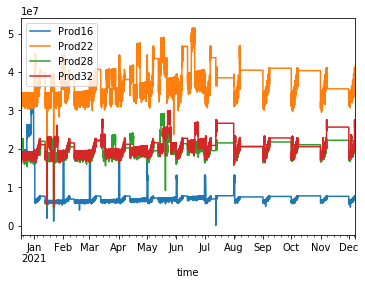

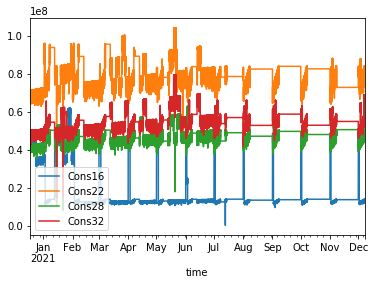

In [83]:
pf.plot()
cf.plot()